# Pandas

**Pandas** - библиотека для обработки и анализа данных на `Python`. Позволяет работать с табличными данными, временными рядами и другими структурами данных, анализировать и визуализировать их. 

Основные особенности:
- богатый инструментарий для анализа данных - аггрегация, трансформация и т.п.
- возможность чтения и записи данных из\в разные форматы - `CSV`, `Excel`, СУБД
- совместимость со многими библиотеками из экосистемы `Python` для научных вычислений
- возможность работать и иерархическими данными

**Pandas**是一个用于`Python`数据处理和分析的库。允许你处理表格数据、时间序列和其他数据结构，对它们进行分析和可视化。

主要特点。
- 丰富的数据分析工具箱--聚合、转换等。
- 能够从/向各种格式读写数据 - `CSV`, `Excel`,DBMS
- 与 `Python`生态系统中用于科学计算的许多库兼容。
- 处理分层数据的能力

### Series

In [2]:
import pandas as pd

Базовая структура данных - это `Series`. Интуитивно это типизированный вектор, каждый элемент которого имеет ассоциированную с ним некоторую уникальную метку. Набор меток, который привязан к `Series` называется индексом. `Series` можно создать из списка `Python` или из массива `NumPy`

底层数据结构是一个 `Series`。直观地说，它是一个类型化的向量，其中每个元素都有一些与之相关的独特标签。与一个 `Series`相关的标签集被称为索引。系列 "可以从`Python`列表或`NumPy`阵列中创建。

In [3]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

по умолчанию в качестве индекса выступают упорядоченные целые числа, но можно использовать строки, даты, и многие другие объекты. 

默认索引是有序的整数，但也可以使用字符串、日期和许多其他对象。

In [4]:
s = pd.Series([1, 2, 3, 4], index=['a', 'c', 'b', 'd'])
s

a    1
c    2
b    3
d    4
dtype: int64

Можно и прямо использовать словарь с аналогичным результатом 你也可以直接使用字典，结果类似

In [5]:
pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4})

a    1
b    2
c    3
d    4
dtype: int64

К элементам `Series` можно обращаться  по индексу 

`Series` 中的元素可以通过一个索引来访问

In [6]:
s['c']

2

Так как индекс упорядоченный, мы можем обращаться к элементам в `Series` с помошью чисел, точно так же как мы это делали  в списках `Python` или массивав `NumPy`

由于索引是有序的，我们可以使用数字访问`Series`中的项目，就像我们对`Python`列表或`NumPy`数组所做的那样

In [7]:
s[2]

3

Можем даже использовать срезы, получаяновый объект `Series` 

我们甚至可以使用切片，获得一个`Series` 对象

In [8]:
s[2:4]

b    3
d    4
dtype: int64

In [9]:
s['c':'d']

c    2
b    3
d    4
dtype: int64

Из объекта `Series` можно получить `NumPy`-массив значений

一个`NumPy`数组的值可以从`Series` 对象中获得

In [10]:
s.values

array([1, 2, 3, 4], dtype=int64)

и значения индекса 和索引值

In [11]:
s.index

Index(['a', 'c', 'b', 'd'], dtype='object')

Рассмотрим более интересный пример - загрузим CSV-файл с информацией о курсе Евро с 01.04.2017 ао 15.04.2017 考虑一个更有趣的例子--让我们上传一个CSV文件，其中包含从2017年4月1日至2017年4月15日的欧元汇率信息

In [12]:
# первые 5 строчек нашего файла 我们文件的前5行
!head -n 5 data/eur.csv

'head' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


Загружаем файл в `Series`
将文件载入 `Series`中

In [13]:
s = pd.read_csv('data/eur.csv', index_col=0, header=None, parse_dates=True).loc[:, 1]
s

0
2017-04-01    59.8107
2017-04-04    59.8953
2017-04-05    60.2427
2017-04-06    59.6948
2017-04-07    60.0827
2017-04-08    60.5687
2017-04-11    60.7469
2017-04-12    60.3042
2017-04-13    60.2631
2017-04-14    60.2867
2017-04-15    59.7791
Name: 1, dtype: float64

In [14]:
s.index

DatetimeIndex(['2017-04-01', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15'],
              dtype='datetime64[ns]', name=0, freq=None)

Как мы видим, `Pandas` сама определила типы данных  (в том числе даты) 我们可以看到，`Pandas`本身已经定义了数据类型（包括日期）。

Мы можем получить даты, для которых курс Евро меньше 60 我们可以得到欧元汇率低于60的日期

In [15]:
s < 60

0
2017-04-01     True
2017-04-04     True
2017-04-05    False
2017-04-06     True
2017-04-07    False
2017-04-08    False
2017-04-11    False
2017-04-12    False
2017-04-13    False
2017-04-14    False
2017-04-15     True
Name: 1, dtype: bool

Обратите внимание, что результат этой операции - новый `Series`, где индекс остается неизменным, а вместо курса евро - булевское значение. Наличие индекса - это основное отличие `Series` от обычных одномерных массивов `NumPy`

请注意，这个操作的结果是一个新的`Series`，其中索引保持不变，是一个布尔值，而不是欧元汇率。索引的存在是`Series`和普通一维数组`NumPy`的主要区别。

Следующая стандартная операция заключается в получии подмножество `Series` на основе некоторого условия. Получим подмножество, где курс меньше 60.

下一个标准操作是根据一些条件获得 `Series`的一个子集。我们得到了比率小于60的子集。

In [16]:
s[s < 60]

0
2017-04-01    59.8107
2017-04-04    59.8953
2017-04-06    59.6948
2017-04-15    59.7791
Name: 1, dtype: float64

Где курс меньше 60 после 4 апреля 2017 года  如果在2017年4月4日之后，该比率低于60

In [17]:
s[(s < 60) & (s.index > '2017-04-04')]

0
2017-04-06    59.6948
2017-04-15    59.7791
Name: 1, dtype: float64

Обратите внимание, что результат двух операций `s < 60` и `s.index > '2017-04-04'`  -- `Series` c логическими значениями. Мы совершаем между ними логическую операци "&" и получаем ещё один `Series` с логическими значениями.

请注意，两个操作的结果`s < 60`和`s.index > '2017-04-04'`- `Series`具有逻辑值。我们在它们之间进行逻辑"&"操作，得到另一个具有逻辑值的`Series`。

### DataFrame数据帧

С помощью `Series` мы можем оперировать одномерными данными (как в примере выше: дата $\rightarrow$ курс евро). Но если данных больше, и мы хотим производить какой-то анализ на основе курса евро и курса доллара? Мы можем создать два объекта `Series`, но одновременная работа с ними может быть не очень удобной. 

通过 `Series`，我们可以对一维数据进行操作（如上面的例子：$\rightarrow$ 欧元汇率）。但如果有更多的数据，我们想根据欧元和美元的汇率做一些分析？我们可以创建两个 `Series`对象，但同时处理它们可能不是很方便。

**DataFrame** можно логически представить как именнованный набор объектов `Series` с одинаковым индексом. Если говорить более простым языком - это таблица, у каждой строки которой есть уникальное значение (индекс) и у каждого столбца - имя. Это чем-то напомнает `Excel`, только управлять таблицей мы будем из `Python`. Стоит отметить, что появление `DataFrame` инспирировано одноименной структурой данных из языка `R`.

**DataFrame**在逻辑上可以表示为一组具有相同索引的`Series`对象。更简单地说，它是一个表，每一行都有一个唯一的值（索引），每一列都有一个名字。这有点像`Excel`，只是我们将从 `Python`来管理这个表。值得注意的是，`DataFrame`的出现是受 `R`语言中同名数据结构的启发。

`DataFrame` можно просто создать, передав в конструктор табличные данные и имена колонок
通过向构造函数传递表数据和列名，可以简单地创建一个`DataFrame` 。

In [18]:
pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]], columns=['a', 'b', 'c'])

,a,b,c
0,1,2,3
1,4,5,6


Или аналогично по столбцам或类似地按列

In [19]:
pd.DataFrame(data={'a' : [1, 4], 'b': [2, 5], 'c': [3, 6]})

,a,b,c
0,1,2,3
1,4,5,6


Вместо списков, можно использовать массивы `NumPy` или `Series`可以使用`NumPy`或`Series`的数组来代替列表

Давайте загрузим исторические данные по евро, доллару и британскому фунту. Наш файл (в формате `CSV`) выглядит так

让我们下载欧元、美元和英镑的历史数据。我们的文件（以 `CSV`格式）看起来像这样

In [20]:
!head -n 5 data/currencies.csv

'head' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


c помощью параметров мы указываем как следует читать файл:
- `index_col=0` - индекс расположен в первой колонке (отсчет идёт, как обычно, с нуля). 
- `header=0` - заголовки таблицы на первой строке. Если наш файл не содержит заголовка, мы можем просто указать `header=False`, в этом случае колонки будут носить численные именования.

参数是用来指定如何读取文件的。
- `index_col=0` - 索引位于第一列（像平常一样从零开始计算）。
- `header=0` - 表头在第一行。如果我们的文件不包含页眉，我们可以简单地指定`header=False`，在这种情况下，列将以数字命名。


Чтобы не заграмождать экран, мы будем использовать метод `.head()`, который обрезает нашу таблицу до 5 строк. 

为了保持屏幕不乱，我们将使用`.head()`方法，将我们的表格修剪成5行。

In [21]:
df = pd.read_csv('data/currencies.csv', index_col=0, header=0, parse_dates=[0])
df.head()

,EUR,USD,GBP
DATE,,,
2017-04-01,59.8107,55.9606,69.7605
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548
2017-04-06,59.6948,55.8940,69.4986
2017-04-07,60.0827,56.4369,70.3655


#### Основные операции基本操作

Мы можем получить один столбец, которые будет представим в виде объекта `Series`

我们可以得到一个单列，以 `Series`对象的形式来表示

In [22]:
df['USD'].head()

DATE
2017-04-01    55.9606
2017-04-04    56.1396
2017-04-05    56.5553
2017-04-06    55.8940
2017-04-07    56.4369
Name: USD, dtype: float64

Или срезать `DataFrame`, взяв только некоторые, интересные нам столбцы:
或者将 `DataFrame`切开，只取一些感兴趣的列。

In [23]:
df[['USD', 'GBP']].head()

,USD,GBP
DATE,,
2017-04-01,55.9606,69.7605
2017-04-04,56.1396,70.3429
2017-04-05,56.5553,70.3548
2017-04-06,55.8940,69.4986
2017-04-07,56.4369,70.3655


мы можем создать новый столбец из старых. В данном случае посчитаем разницу между курсом фунта и евро на каждый день

我们可以从旧列中创建一个新列。在这种情况下，我们将计算出每天的英镑汇率和欧元汇率之间的差异

In [24]:
df['GBP-EUR'] = df['GBP'] - df['EUR']
df.head(5)

,EUR,USD,GBP,GBP-EUR
DATE,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498
2017-04-04,59.8953,56.1396,70.3429,10.4476
2017-04-05,60.2427,56.5553,70.3548,10.1121
2017-04-06,59.6948,55.8940,69.4986,9.8038
2017-04-07,60.0827,56.4369,70.3655,10.2828


Или можно посмотреть на сколько изменялся курс евро и доллара с прошлого дня 或者你可以看看欧元和美元的汇率自去年以来有多大变化

In [25]:
df['$\Delta$ EUR'] = df['EUR'] - df['EUR'].shift(1)
df['$\Delta$ USD'] = df['USD'] - df['USD'].shift(1)
df.head()

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498,NaN,NaN
2017-04-04,59.8953,56.1396,70.3429,10.4476,0.0846,0.1790
2017-04-05,60.2427,56.5553,70.3548,10.1121,0.3474,0.4157
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613
2017-04-07,60.0827,56.4369,70.3655,10.2828,0.3879,0.5429


Индексация осуществляется  с помощью свойств **.loc** и **.iloc**. Допустим, мы хотим получить новый `DataFrame`, состоящий из строк, где изменение доллара и евро c прошлого дня отрицательные

索引是使用**.loc**和**.iloc**属性完成的。假设我们想得到一个新的 `DataFrame`，其中有几行美元和欧元的变化是负数的

In [26]:
df.loc[(df['$\Delta$ USD'] < 0) & (df['$\Delta$ EUR'] < 0)]

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613
2017-04-12,60.3042,56.9552,70.7384,10.4342,-0.4427,-0.4344
2017-04-13,60.2631,56.7556,70.9502,10.6871,-0.0411,-0.1996
2017-04-15,59.7791,56.2945,70.4413,10.6622,-0.5076,-0.3074


Если к данным нужно обратиться по номеру строки, то используется свойство **.iloc**

如果要按行号访问数据，那么就使用 **.iloc**属性。

In [27]:
df.iloc[0:2]

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498,NaN,NaN
2017-04-04,59.8953,56.1396,70.3429,10.4476,0.0846,0.179


`Pandas` имеет большое количество функций для подсчет статистических характеристик наших данных. Например, посчитаем коэффицент корреляции между значениями доллара и евро

`Pandas`有许多函数来计算我们数据的统计特征。例如，让我们计算一下美元和欧元价值之间的相关系数

In [28]:
df['USD'].corr(df['EUR'])

0.9529946342029497

Или математическое ожидание курсов валют或者汇率的数学期望值

In [29]:
df[['USD', 'EUR', 'GBP']].mean()

USD    56.536664
EUR    60.152264
GBP    70.509236
dtype: float64

Можно сразу визуализировать наши данные, с помощью специальных функций (используется библиотека `matplotlib`)

你可以直接将我们的数据可视化，使用特殊函数（使用`matplotlib`库）。

#### Визуализация视觉化

<AxesSubplot: xlabel='DATE'>

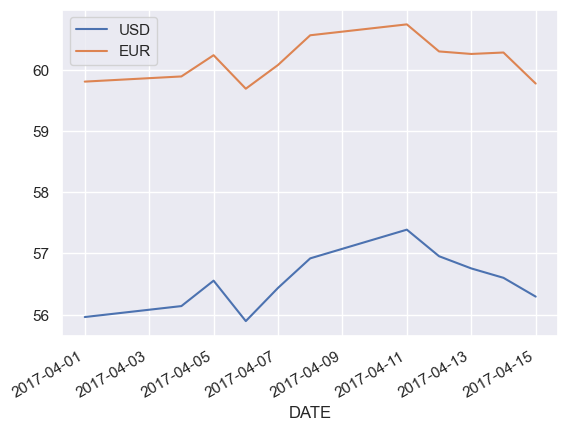

In [30]:
%matplotlib inline

import seaborn as sns
sns.set()


df[['USD', 'EUR']].plot()

#### Сохранение保存

`DataFrame` можно сохранить в `CSV`-файл, `Excel` и в другие форматы:

`DataFrame`可以被保存为 `CSV`文件、`Excel` 和其他格式。

> df.to_csv('data/curr.csv')

> df.to_excel('data/curr.xsl')

In [31]:
import numpy as np
l = 365

eur = 60. + np.random.normal(0.0, 2., l).cumsum()
usd = 55. + np.random.normal(0.0, 2., l).cumsum()

df = pd.DataFrame({
            "EUR": eur,
            "USD":usd
        }, 
        index=pd.date_range("2021-11-11", periods=l, freq="1D")
)
df

,EUR,USD
2021-11-11,56.687113,54.785208
2021-11-12,57.807790,56.747019
2021-11-13,59.174395,55.951406
2021-11-14,55.612254,53.207822
2021-11-15,55.529648,47.664212
...,...,...
2022-11-06,73.727047,14.306070
2022-11-07,72.677445,15.436565
2022-11-08,75.694750,17.039110
2022-11-09,72.841523,13.761002


In [32]:
df.sort_values(by="EUR")

,EUR,USD
2021-11-15,55.529648,47.664212
2021-11-14,55.612254,53.207822
2021-11-11,56.687113,54.785208
2021-11-16,57.176585,49.470493
2021-11-12,57.807790,56.747019
...,...,...
2022-04-24,107.591222,30.526691
2022-04-27,108.162280,32.559199
2022-04-26,108.389570,30.435763
2022-04-23,108.629260,30.393918
